# Gradient Descent Logic

In the process of model fitting, we rely on a set of training data consisting of pairs $(x_i, y_i)$, which represent the input and output respectively. Our objective is to determine the set of parameters, denoted by $\phi$, for our model function $f[x_i, \phi]$ such that it can accurately map the input values $x_i$ to their corresponding outputs $y_i$. To achieve this, we introduce a loss function $L[\phi]$, which produces a numerical value indicative of the error between the model's predictions and the actual outputs. The purpose of optimization algorithms in this context is to identify the optimal parameters $\hat{\phi}$ that minimize this error, formalized as:

$$\hat{\phi} = \text{argmin}[L|\phi|]$$

Optimization algorithms, particularly for neural network training, generally follow an iterative approach. They begin with an initial guess of the parameters, typically based on heuristic methods, and then modify these parameters incrementally to reduce the loss function. Gradient descent stands out as one of the most fundamental methods within this category. It commences with a starting point for the parameters $\phi = [\phi_0,\phi_1,...,\phi_N]^T$ and performs the following steps iteratively:

- Compute derivatives of the loss with respect to the parameters:

$$\frac{\partial L}{\partial \boldsymbol{\phi}} =
\begin{bmatrix}
\frac{\partial L}{\partial \phi_0} \\
\frac{\partial L}{\partial \phi_1} \\
\vdots \\
\frac{\partial L}{\partial \phi_N} \\
\end{bmatrix}$$

- Update the parameters according to the rule:

$$\phi \leftarrow \phi - \alpha \cdot \frac{\partial L}{\partial \phi}$$ (where the positive scalar $\alpha$ determines the magnitude of the change)

In the first step, the gradient, representing the direction of steepest increase of the loss function, is computed. The subsequent step then proceeds in the opposite direction (thus the negative sign), effectively moving towards a lower loss value by a distance determined by $\alpha$. The learning rate $\alpha$ could be constant or determined dynamically through a process called line search, which involves experimenting with various $\alpha$ values to find the one that maximizes the reduction in loss.

When the loss function reaches its minimum, indicated by a flat gradient (gradient equals zero), further improvements are not possible, and thus the parameter adjustments cease. This state represents the point where the model's predictions are optimally aligned with the actual outputs.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [2]:
def FunctionExample(value:int|float)->int|float:
  return (value-3)**2+4

In [3]:
def DerivativeExample(value:int|float)->int|float:
  return 2*(value-3)

In [4]:
def GradientDescentExample(startValue:int|float,learningRate:int|float,iterations:int)->int|float:
  x = startValue
  for idx in range(iterations):
    gradient = DerivativeExample(x)
    x = x-learningRate*gradient
    if idx % 10 == 0:
      print(f"Iteration: {idx} --> Value: {x}, f(x) = {FunctionExample(x)}")
  return x

In [5]:
valueMin = GradientDescentExample(0,learningRate=0.1,iterations=50)
print(f"Last Value: {valueMin}")

Iteration: 0 --> Value: 0.6000000000000001, f(x) = 9.76
Iteration: 10 --> Value: 2.74230196224, f(x) = 4.066408278665355
Iteration: 20 --> Value: 2.9723298838894356, f(x) = 4.000765635325572
Iteration: 30 --> Value: 2.997028943905715, f(x) = 4.000008827174315
Iteration: 40 --> Value: 2.9996809852810116, f(x) = 4.000000101770391
Last Value: 2.9999571825692186


- example:

In [6]:
np.random.seed(42) # For reproducibility

In [7]:
value = 2*np.random.rand(100,1) # 100 data points
trueSlope = 2
trueIntercept = 1
groundTruth = trueSlope*value+trueIntercept+np.random.randn(100,1) # Add noise

In [8]:
def Prediction(value:np.ndarray,slope:int|float,intercept:int|float)->np.ndarray:
  return slope*value+intercept

In [9]:
def MSELoss(value:np.ndarray,groundTruth:np.ndarray,slope:int|float,intercept:int|float)->np.ndarray:
  predictions = Prediction(value,slope,intercept)
  return ((predictions-groundTruth)**2).mean()

In [10]:
def GradientDescent(value:np.ndarray,groundTruth:np.ndarray,slopeInitial:int|float,interceptInitial:int|float,learningRate:int|float,iterations:int)->tuple:
  w = slopeInitial
  b = interceptInitial
  for idx in range(iterations):
    prediction = Prediction(value,w,b)
    wGradient = 2*(prediction-groundTruth).T.dot(value).mean()
    bGradient = 2*(prediction-groundTruth).mean()
    w = w-learningRate*wGradient
    b = b-learningRate*bGradient
    if idx % 10 == 0:
      loss = MSELoss(value,groundTruth,w,b)
      print(f"Iteration: {idx}: Loss --> {loss} | slope(w) = {w} & intercept(b) = {b}")
  return w,b


In [11]:
learningRate = 0.01
iterations = 100
slopeInitial = 0
interceptInitial = 0

In [12]:
wFinal,bFinal = GradientDescent(value,groundTruth,slopeInitial,interceptInitial,learningRate,iterations)
print(f"Final Parameters --> Slope: {wFinal} & Intercept: {bFinal}")

Iteration: 0: Loss --> 20.990779823035613 | slope(w) = 6.656517187603891 & intercept(b) = 0.057592852266909605
Iteration: 10: Loss --> 52970.01790229749 | slope(w) = 208.54875571945047 & intercept(b) = 1.664445643336844
Iteration: 20: Loss --> 141818858.1790049 | slope(w) = 10657.716093603047 & intercept(b) = 81.48835740214926
Iteration: 30: Loss --> 379705937015.80475 | slope(w) = 551337.7240020445 & intercept(b) = 4208.727775817216
Iteration: 40: Loss --> 1016625021525087.2 | slope(w) = 28528074.065639667 & intercept(b) = 217764.01896399088
Iteration: 50: Loss --> 2.721912758374477e+18 | slope(w) = 1476145338.8372939 & intercept(b) = 11267882.370400306
Iteration: 60: Loss --> 7.287651697857544e+21 | slope(w) = 76381084808.3669 & intercept(b) = 583040865.8328425
Iteration: 70: Loss --> 1.951196529201149e+25 | slope(w) = 3952232867821.13 & intercept(b) = 30168637662.749153
Iteration: 80: Loss --> 5.224135364051291e+28 | slope(w) = 204502786012407.62 & intercept(b) = 1561034144112.2568


- example:

In [13]:
# Generate Synthetic Data
np.random.seed(42)
value = 2*np.random.rand(100,1) # 100 data points
groundTruth = 2*value+1+np.random.randn(100,1) # true relationship: y = 2x + 1 with noise

In [14]:
# Define the Model
def FunctionPrediction(sample:np.ndarray,slope:int|float,intercept:int|float)->int|float:
  return slope*sample+intercept

In [15]:
# Define Loss Function
def MSELoss(groundTruth:np.ndarray,predictions:np.ndarray)->np.ndarray:
  return ((groundTruth-predictions)**2).mean()

In [16]:
def GradientDescent(sample:np.ndarray,groundTruth:np.ndarray,wInitial:int|float,bInitial:int|float,learningRate:int|float,iterations:int)->tuple:
  w = wInitial
  b = bInitial
  bestLoss = float("inf")
  wBest = w
  bBest = b
  for idx in range(iterations):
    prediction = FunctionPrediction(sample,w,b)
    loss = MSELoss(groundTruth,prediction)
    if loss < bestLoss:
      bestLoss = loss
      wBest = w
      bBest = b
    wGradient = 2*(prediction-groundTruth).T.dot(sample).mean()
    bGradient = 2*(prediction-groundTruth).mean()
    w -= learningRate*wGradient
    b -= learningRate*bGradient
    if idx % 10 == 0:
      print(f"Iteration: {idx}: Loss --> {loss}, w = {w} & b = {b}")
  return wBest,bBest,bestLoss

In [17]:
wInitial = 0
bInitial = 0
learningRate = 0.05
iterations = 100

In [18]:
bestSlope,bestIntercept,bestLoss = GradientDescent(value,groundTruth,wInitial,bInitial,learningRate,iterations)

Iteration: 0: Loss --> 10.197022328968771, w = 33.28258593801945 & b = 0.28796426133454806
Iteration: 10: Loss --> 1.2771184314688813e+22, w = 1154628762436.1167 & b = 8813644826.791584
Iteration: 20: Loss --> 1.8152085087772316e+43, w = 4.3530138080543355e+22 & b = 3.322792474695542e+20
Iteration: 30: Loss --> 2.5800128235151436e+64, w = 1.6411100978614384e+33 & b = 1.2527110006476654e+31
Iteration: 40: Loss --> 3.667053199296949e+85, w = 6.187075143937068e+43 & b = 4.722789229524378e+41
Iteration: 50: Loss --> 5.21209780196081e+106, w = 2.332561288033456e+54 & b = 1.7805174613282456e+52
Iteration: 60: Loss --> 7.408118186671788e+127, w = 8.793884082309823e+64 & b = 6.712648555807024e+62
Iteration: 70: Loss --> 1.0529390881163291e+149, w = 3.315342565695231e+75 & b = 2.5307053490036654e+73
Iteration: 80: Loss --> 1.4965753722421893e+170, w = 1.2499023440645108e+86 & b = 9.540898067626883e+83
Iteration: 90: Loss --> 2.1271295463146475e+191, w = 4.712200440048197e+96 & b = 3.59697093826

In [19]:
print(f"Best Loss: {bestLoss} at slope (w) --> {bestIntercept} & intercept (b) --> {bestIntercept}")

Best Loss: 10.197022328968771 at slope (w) --> 0 & intercept (b) --> 0


-> example with line search:

In [20]:
def LossFunction(phiValue:int|float)->np.ndarray:
  value = 1-0.5*np.exp(-(phiValue-0.65)**2/0.1)-0.45*np.exp(-(phiValue-0.35)**2/0.02)
  return value

In [21]:
def DrawFunction(lossFunction,aPoint:None=None,bPoint:None=None,cPoint:None=None,dPoint:None=None)->None:
  phi = np.arange(0,1,0.01)
  figure,axs = plt.subplots(figsize=(8,8))
  axs.plot(phi,lossFunction(phi),"r-",label="Phi - Loss Function|phi|")
  axs.set_xlim(0,1)
  axs.set_ylim(0,1)
  axs.set_xlabel("$\phi$")
  axs.set_ylabel("$L|\phi|$")
  if aPoint is not None and bPoint is not None and cPoint is not None and dPoint is not None:
    plt.axvspan(aPoint,dPoint,facecolor="k",alpha=0.3)
    axs.plot([aPoint,aPoint],[0,1],"k-",label="a")
    axs.plot([bPoint,bPoint],[0,1],"r-",label="b")
    axs.plot([cPoint,cPoint],[0,1],"b-",label="c")
    axs.plot([dPoint,dPoint],[0,1],"y-",label="d")
  plt.tight_layout()
  plt.legend()
  plt.show()

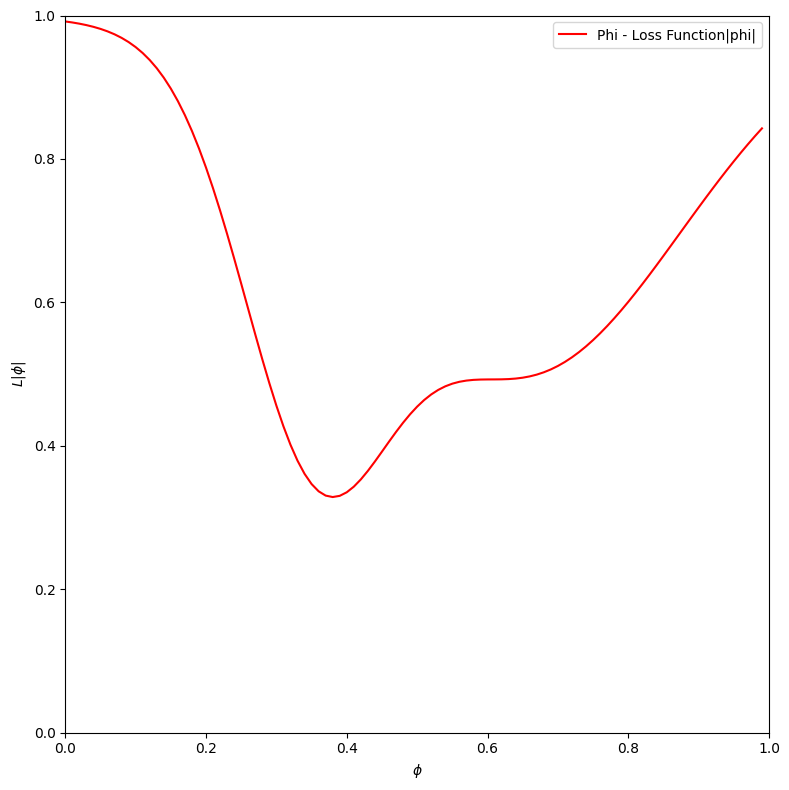

In [22]:
DrawFunction(LossFunction)

In [23]:
def LineSearchLogic(lossFunction,threshold:float=0.0001,maxIteration:int=10,drawFlag:None=None)->int|float:
  a = 0
  b = 0.33
  c = 0.66
  d = 1.0
  iteration = 0
  while np.abs(b-c) > threshold and iteration < maxIteration:
    iteration += 1
    lossA = lossFunction(a)
    lossB = lossFunction(b)
    lossC = lossFunction(c)
    lossD = lossFunction(d)
    if drawFlag:
      DrawFunction(lossFunction,a,b,c,d)
    print(f"Iteration: {iteration} --> a={a}, b={b}, c={c}, d={d}\nLoss A: {lossA}, Loss B: {lossB}, Loss C: {lossC}, Loss D: {lossD}\n\n")
    if lossA < lossB and lossA < lossC and lossA < lossD:
      b = (a+b)/2
      c = (a+c)/2
      d = (a+d)/2
    elif lossB < lossC:
      d = c
      b = a+(d-a)/3
      c = a+2*(d-a)/3
    else:
      a = b
      b = a+(d-a)/3
      c = a+2-(d-a)/3
  solution = (b+c)/2
  return solution

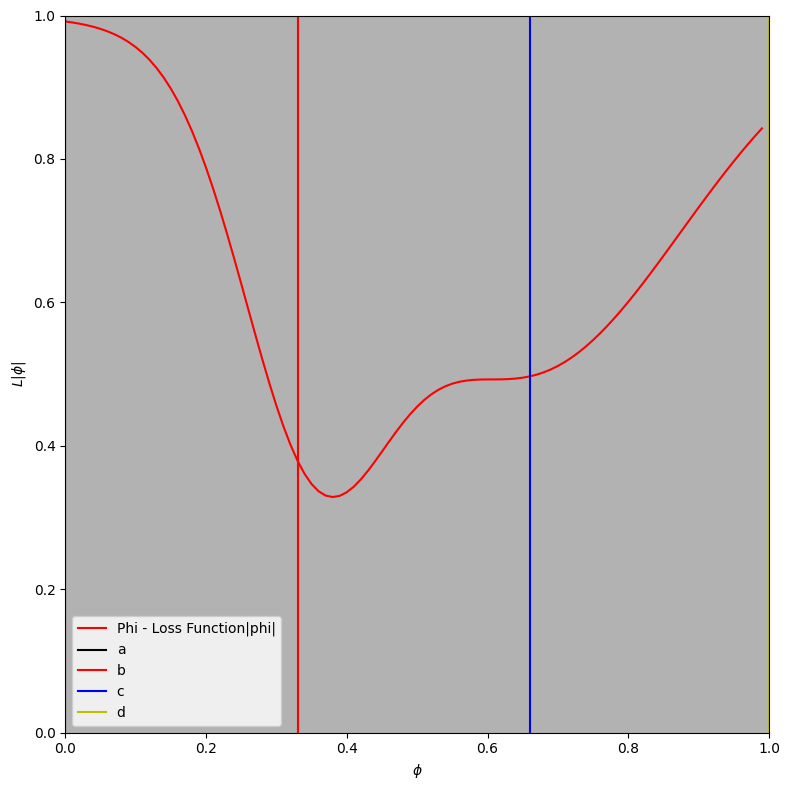

Iteration: 1 --> a=0, b=0.33, c=0.66, d=1.0
Loss A: 0.9917029616420207, Loss B: 0.3793328763472578, Loss C: 0.49681483462684417, Loss D: 0.8531211495371123




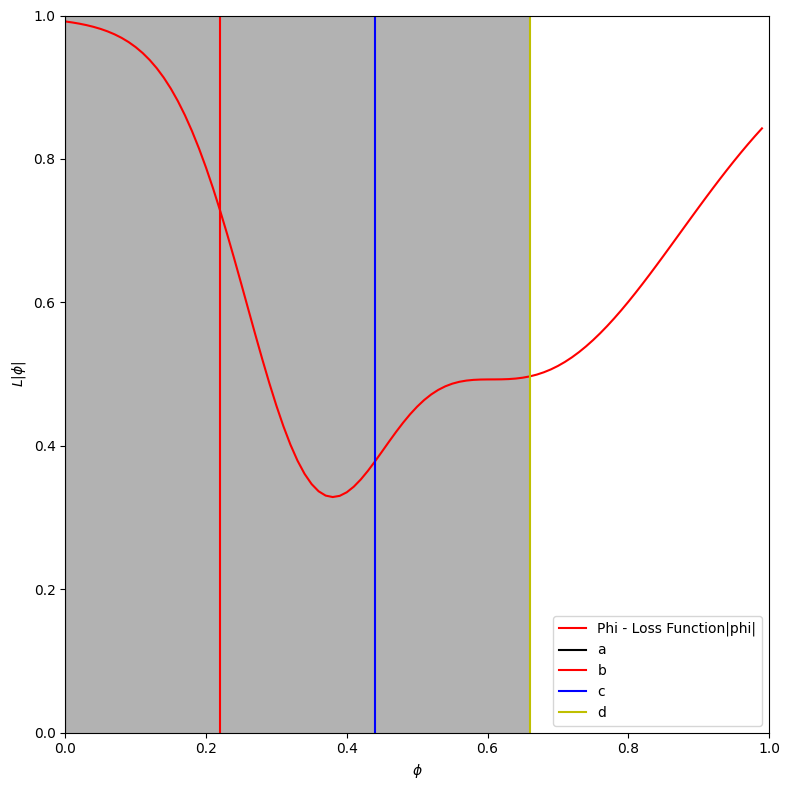

Iteration: 2 --> a=0, b=0.22, c=0.44, d=0.66
Loss A: 0.9917029616420207, Loss B: 0.7280019477427988, Loss C: 0.3781640818272085, Loss D: 0.49681483462684417




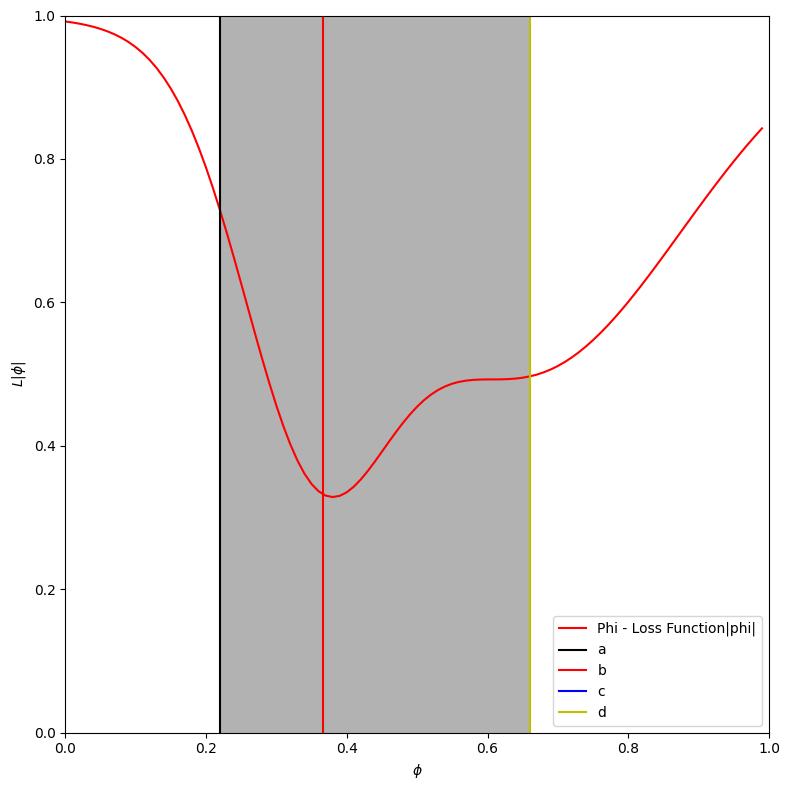

Iteration: 3 --> a=0.22, b=0.3666666666666667, c=2.0733333333333337, d=0.66
Loss A: 0.7280019477427988, Loss B: 0.33216551745322576, Loss C: 0.9999999992044003, Loss D: 0.49681483462684417




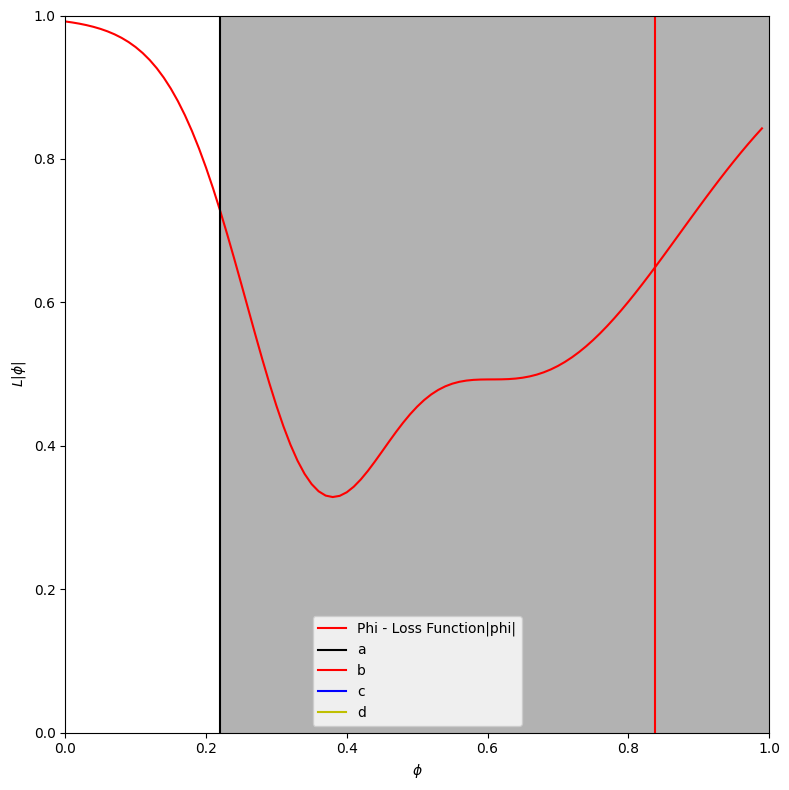

Iteration: 4 --> a=0.22, b=0.8377777777777778, c=1.4555555555555557, d=2.0733333333333337
Loss A: 0.7280019477427988, Loss B: 0.6485695283829557, Loss C: 0.9992401159570756, Loss D: 0.9999999992044003




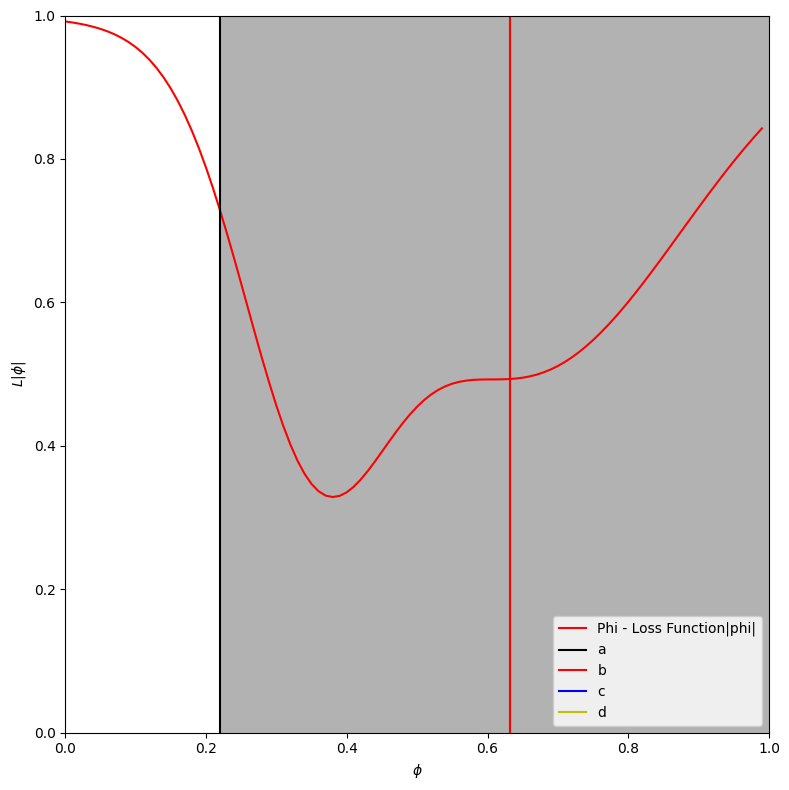

Iteration: 5 --> a=0.22, b=0.6318518518518519, c=1.0437037037037038, d=1.4555555555555557
Loss A: 0.7280019477427988, Loss B: 0.49316818936904555, Loss C: 0.8938787789547035, Loss D: 0.9992401159570756




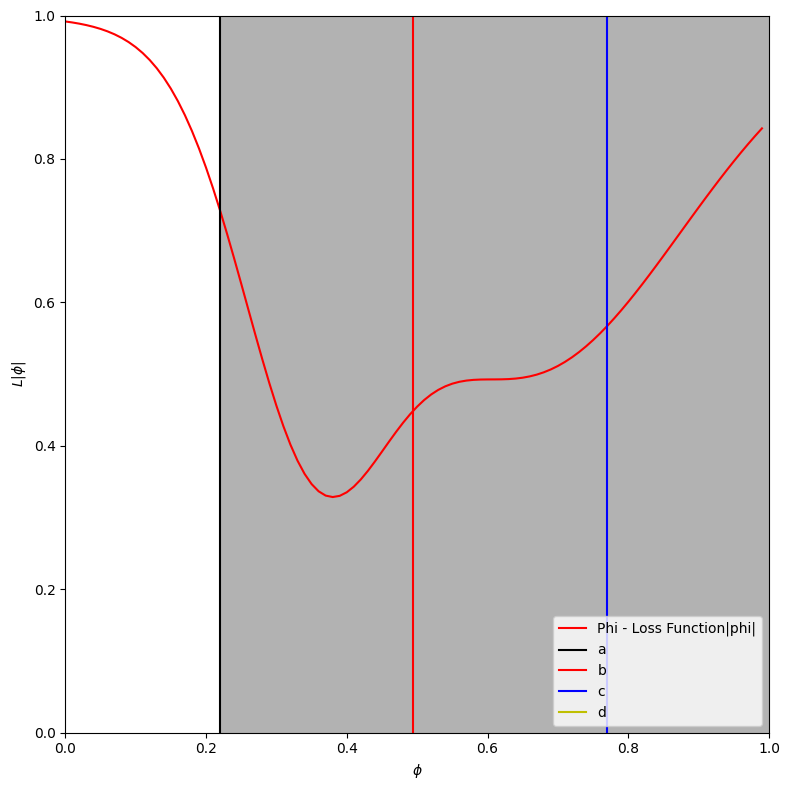

Iteration: 6 --> a=0.22, b=0.49456790123456795, c=0.7691358024691358, d=1.0437037037037038
Loss A: 0.7280019477427988, Loss B: 0.44904919739343035, Loss C: 0.566091534792939, Loss D: 0.8938787789547035




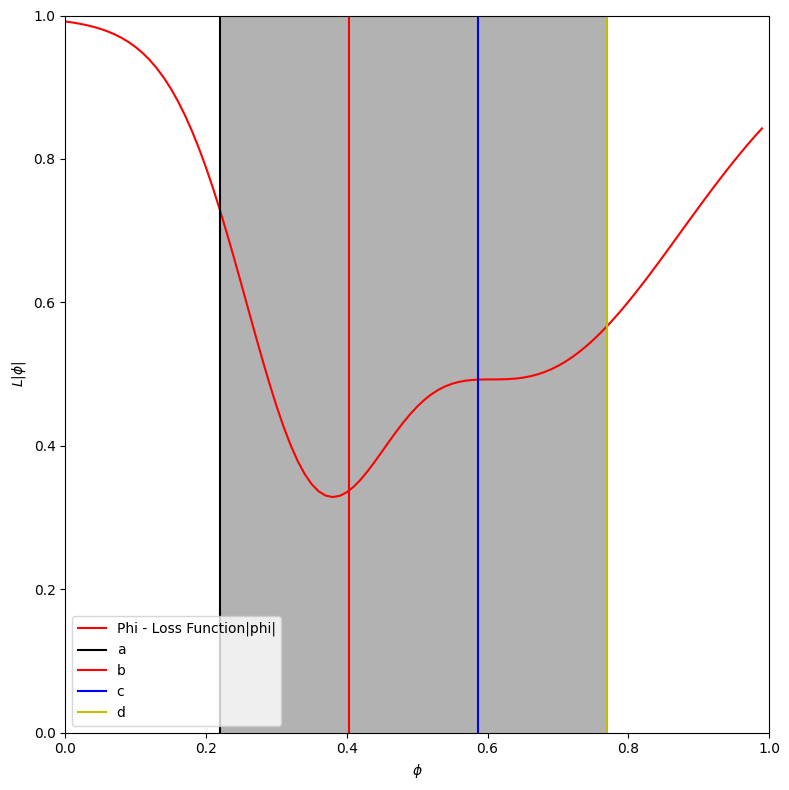

Iteration: 7 --> a=0.22, b=0.4030452674897119, c=0.5860905349794239, d=0.7691358024691358
Loss A: 0.7280019477427988, Loss B: 0.3373469115281498, Loss C: 0.4922863221629683, Loss D: 0.566091534792939




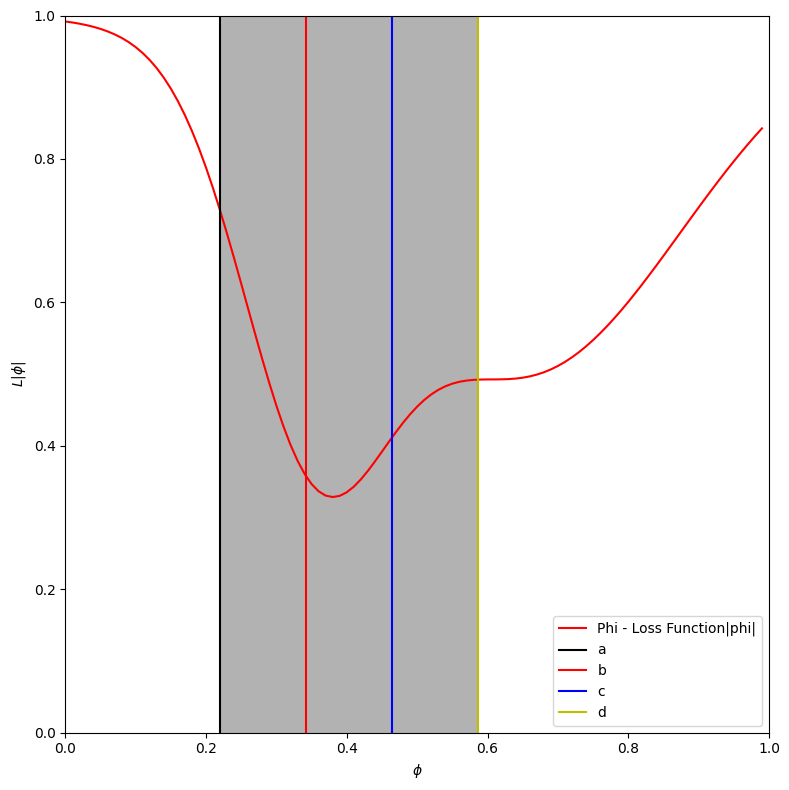

Iteration: 8 --> a=0.22, b=0.34203017832647464, c=0.46406035665294926, d=0.5860905349794239
Loss A: 0.7280019477427988, Loss B: 0.35775721694024304, Loss C: 0.4113442509418768, Loss D: 0.4922863221629683




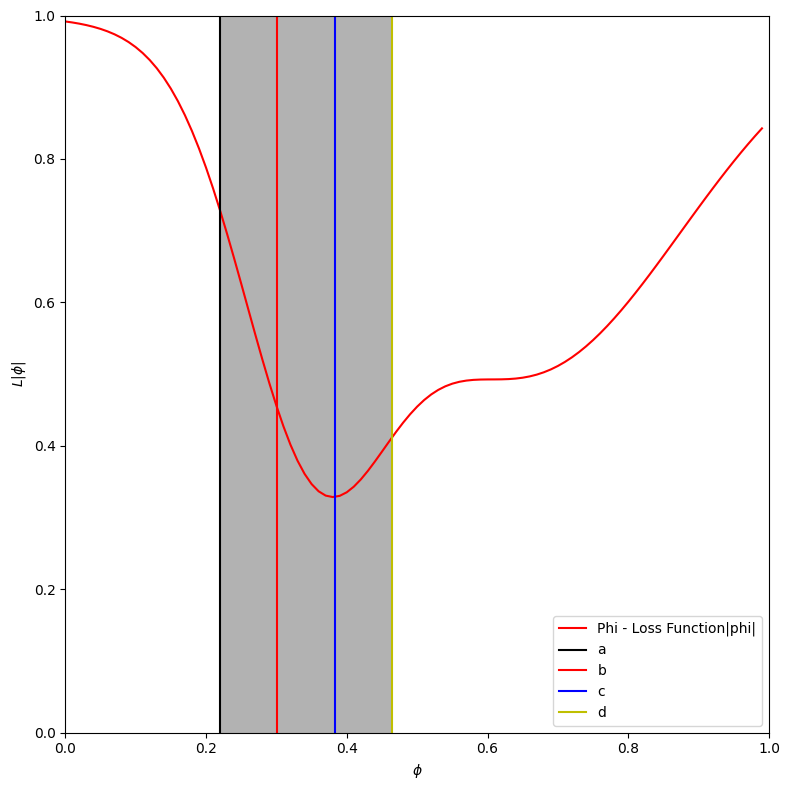

Iteration: 9 --> a=0.22, b=0.30135345221764975, c=0.38270690443529953, d=0.46406035665294926
Loss A: 0.7280019477427988, Loss B: 0.4519421580569773, Loss C: 0.3287076603852653, Loss D: 0.4113442509418768




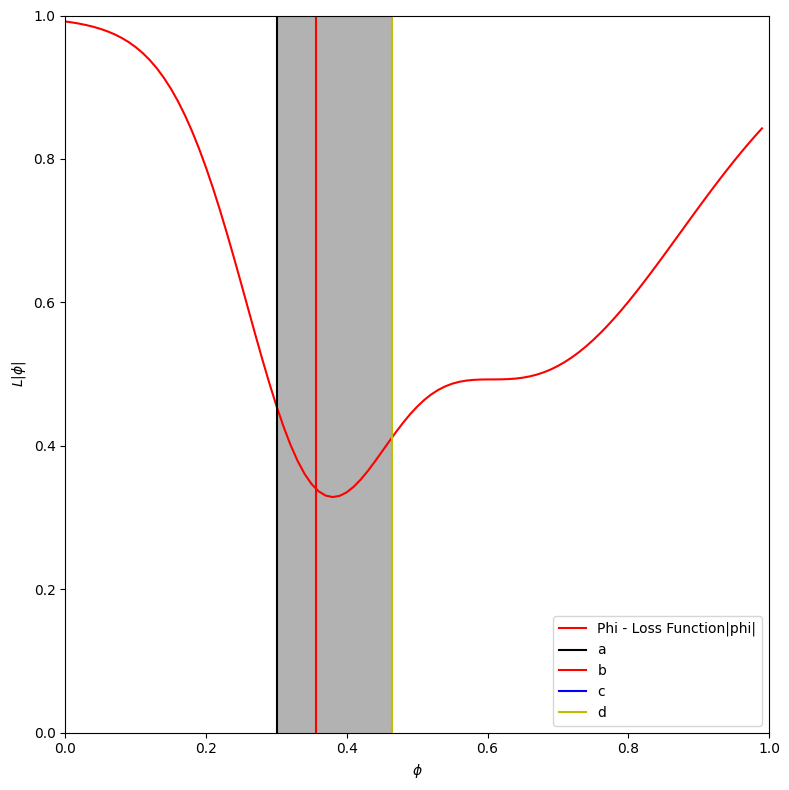

Iteration: 10 --> a=0.30135345221764975, b=0.3555890870294163, c=2.2471178174058832, d=0.46406035665294926
Loss A: 0.4519421580569773, Loss B: 0.3405504798518715, Loss C: 0.9999999999958212, Loss D: 0.4113442509418768




In [24]:
solution = LineSearchLogic(LossFunction,drawFlag=True)

In [25]:
print(f"Solution: {solution} --> Loss: {LossFunction(solution)}")

Solution: 1.2742356348117665 --> Loss: 0.9898456029281034


- example:

In [26]:
data = np.array(
    [
        [0.03,0.19,0.34,0.46,0.78,0.81,1.08,1.18,1.39,1.60,1.65,1.90],
        [0.67,0.85,1.05,1.00,1.40,1.50,1.30,1.54,1.55,1.68,1.73,1.60]
    ]
)
print(f"Data shape: {data.shape}")

Data shape: (2, 12)


In [27]:
def ModelBase(phiValues:np.ndarray,sample:np.ndarray)->np.ndarray:
  # intercept phiValues[0] and slope phiValues[1]
  return phiValues[0]+phiValues[1]*sample

In [28]:
def DrawModel(data:np.ndarray,model,phiValues:np.ndarray,title:None=None)->None:
  xSample = np.arange(0,2,0.01)
  yModel = model(phiValues,xSample)
  figure,axs = plt.subplots(figsize=(8,8))
  axs.plot(data[0,:],data[1,:],"bo",label="Data")
  axs.plot(xSample,yModel,"m-",label="Sample - Model Output")
  axs.set_xlim([0,2])
  axs.set_ylim([0,2])
  axs.set_aspect("equal")
  axs.set_xlabel("x")
  axs.set_ylabel("y")
  if title is not None:
    axs.set_title(title)
  plt.tight_layout()
  plt.legend()
  plt.show()

In [29]:
phiValues = np.zeros((2,1))
print(f"Phi shape:\n{phiValues.shape}")
print(f"Phi values:\n{phiValues}")

Phi shape:
(2, 1)
Phi values:
[[0.]
 [0.]]


In [30]:
phiValues[0] = 0.6
phiValues[1] = -0.2

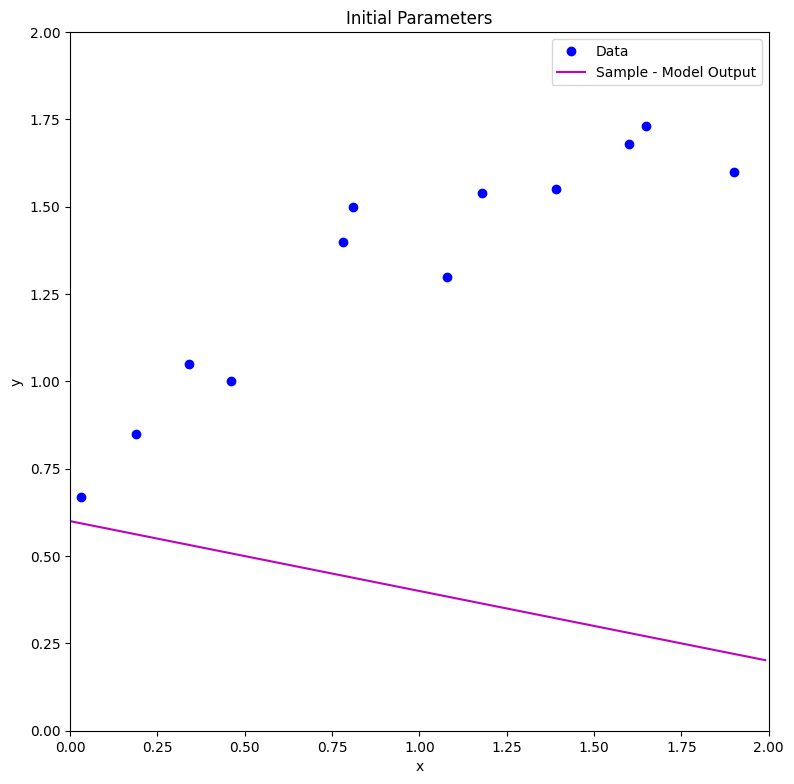

In [31]:
DrawModel(data,ModelBase,phiValues,"Initial Parameters")

In [32]:
def ComputeLoss(sample:np.ndarray,groundTruth:np.ndarray,model,phiValues:np.ndarray)->np.ndarray:
  # Make model predictions for sample using the provided phiValues parameters
  yPrediction = model(phiValues,sample)
  # Compute the squared differences between predicted and true y values
  squared = (yPrediction-groundTruth)**2
  # Sum the squared differences to get the total loss
  loss = np.sum(squared)
  return loss

In [33]:
loss = ComputeLoss(data[0,:],data[0,:],ModelBase,np.array([[0.6],[-0.2]]))
print(f"Control: 12.367 --> Check: {loss}")

Control: 12.367 --> Check: 9.507024


In [34]:
def DrawLossFunction(computeLoss,data:np.ndarray,model,phiIteration:None=None)->None:
  colorHex = ('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
  colorDec = np.array([int(element,base=16) for element in colorHex])
  r = np.floor(colorDec/(256**2))
  g = np.floor((colorDec-r*256**2)/256)
  b = np.floor(colorDec-r*256**2-g*256)
  colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)
  interceptMesh,slopeMesh = np.meshgrid(np.arange(0.0,2.0,0.02),np.arange(-1.0,1.0,0.002))
  lossMesh = np.zeros_like(slopeMesh)
  for idx,slope in np.ndenumerate(slopeMesh):
    lossMesh[idx] = computeLoss(data[0,:],data[1,:],model,np.array([[interceptMesh[idx]],[slope]]))
  figure,axs = plt.subplots(figsize=(8,8))
  figure.set_size_inches(8,8)
  axs.contourf(interceptMesh,slopeMesh,lossMesh,256,cmap=colormap)
  axs.contour(interceptMesh,slopeMesh,lossMesh,40,colors=["#80808080"])
  if phiIteration is not None:
    axs.plot(phiIteration[0,:],phiIteration[1,:],"go-",label="Phi Iteration")
    plt.legend()
  axs.set_ylim([1,-1])
  axs.set_xlabel("Intercept $\phi_0$")
  axs.set_ylabel("Slope $\phi_1$")
  plt.tight_layout()
  plt.show()

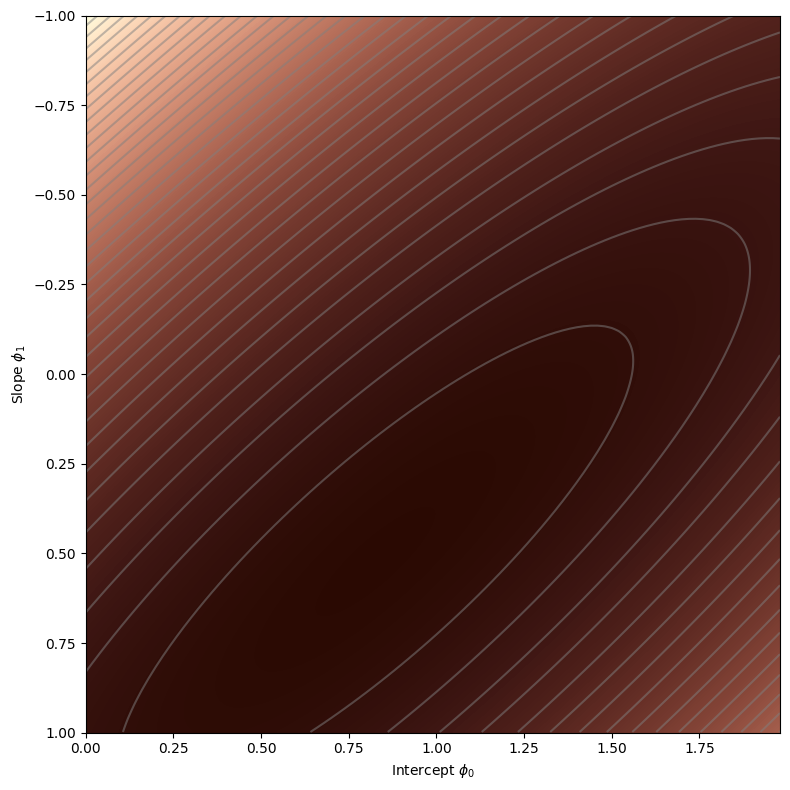

In [35]:
DrawLossFunction(ComputeLoss,data,ModelBase)

In [36]:
def ComputeGradient(sample:np.ndarray,groundTruth:np.ndarray,phiValues:np.ndarray)->np.ndarray:
  yPrediction = ModelBase(phiValues,sample)
  diff = yPrediction-groundTruth
  # derivative_0 is the derivative of the loss with respect to phi-0
  derivative_0 = 2*np.sum(diff)
  # derivative_1 is the derivative of the loss with respect to phi-1, which also involves the sample values
  derivative_1 = 2*np.sum(diff*sample)
  return np.array([derivative_0,derivative_1])

In [37]:
gradient = ComputeGradient(data[0,:],data[1,:],phiValues)
print(f"Gradients:\n\n{gradient[0]}\n{gradient[1]}")

Gradients:

-21.904
-26.84044


In [38]:
delta = .0001

In [39]:
approxPhi_0_estimation = (
    ComputeLoss(
        data[0,:],data[1,:],
        ModelBase,
        phiValues+np.array([[delta],[0]])
    )-ComputeLoss(
        data[0,:],data[1,:],
        ModelBase,
        phiValues)
)/delta

approxPhi_1_estimation = (
    ComputeLoss(
        data[0,:],data[1,:],
        ModelBase,
        phiValues+np.array([[0],[delta]])
    )-ComputeLoss(
        data[0,:],data[1,:],
        ModelBase,
        phiValues
    )
)/delta
print(f"Approx Gradients:\n\n{approxPhi_0_estimation}\n{approxPhi_1_estimation}")

Approx Gradients:

-21.902799999988787
-26.83893878998589


- with 1D loss function:

In [40]:
def LossFunction1D(distributionProbability:int|float,data:np.ndarray,model,phiStart:int|float,searchDirection:int|float)->np.ndarray:
  # return the loss after moving this far
  return ComputeLoss(data[0,:],data[1,:],model,phiStart+searchDirection*distributionProbability)

In [41]:
def LineSearch1D(data:np.ndarray,model,phi:np.ndarray,gradient:np.ndarray,threshold:float=0.00001,maxDistance:float=0.1,maxIterations:int=15,verbose:bool=False,drawFlag:bool=False)->np.ndarray:
  a = 0
  b = 0.33*maxDistance
  c = 0.66*maxDistance
  d = 1.0*maxDistance
  iteration = 0
  while np.abs(b-c) > threshold and iteration < maxIterations:
    iteration += 1
    lossA = LossFunction1D(a,data,model,phi,gradient)
    lossB = LossFunction1D(b,data,model,phi,gradient)
    lossC = LossFunction1D(c,data,model,phi,gradient)
    lossD = LossFunction1D(d,data,model,phi,gradient)
    if drawFlag:
      DrawFunction(LossFunction1D,a,b,c,d)
    if verbose:
      print(f"At iteration: {iteration} --> a:{a} | b:{b} | c:{c} | d:{d}")
      print(f"Loss A: {lossA} | Loss B: {lossB} | Loss C: {lossC} | Loss D: {lossD}")
    if np.argmin((lossA,lossB,lossC,lossD)) == 0:
      b = b/2
      c = c/2
      d = d/2
      continue
    if lossB < lossC:
      d = c
      b = a+(d-a)/3
      c = a+2*(d-a)/3
      continue
    a = b
    b = a+(d-a)/3
    c = a+2*(d-a)/3
  return (b+c)/2.0

In [56]:
def GradientDescentStep(phiValues:np.ndarray,data:np.ndarray,model)->np.ndarray:
  gradient = ComputeGradient(data[0,:],data[1,:],phiValues)
  alpha = 0.01 # This is a hyperparameter you might need to adjust
  phiValues -= alpha*gradient.reshape(phiValues.shape)
  return phiValues


In [65]:
steps = 20
phiBase = np.zeros((2,steps+1))
phiBase[0,0] = 1.6
phiBase[1,0] = -0.5
print(f"Phi base shape: {phiBase.shape}")

Phi base shape: (2, 21)


In [66]:
print(f"Phi Base:\n{phiBase}")

Phi Base:
[[ 1.6  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0. ]
 [-0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0. ]]


In [67]:
print(f"Parameters:\n{phiBase[:,0:1]}")

Parameters:
[[ 1.6]
 [-0.5]]


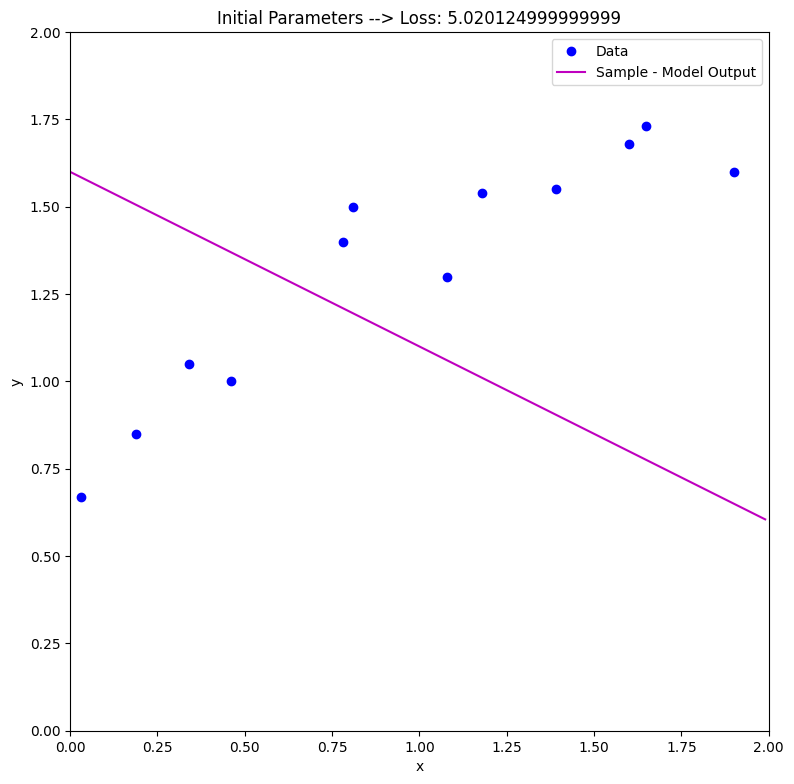

In [68]:
loss = ComputeLoss(data[0,:],data[1,:],ModelBase,phiBase[:,0:1])
DrawModel(data,ModelBase,phiBase[:,0:1],f"Initial Parameters --> Loss: {loss}")

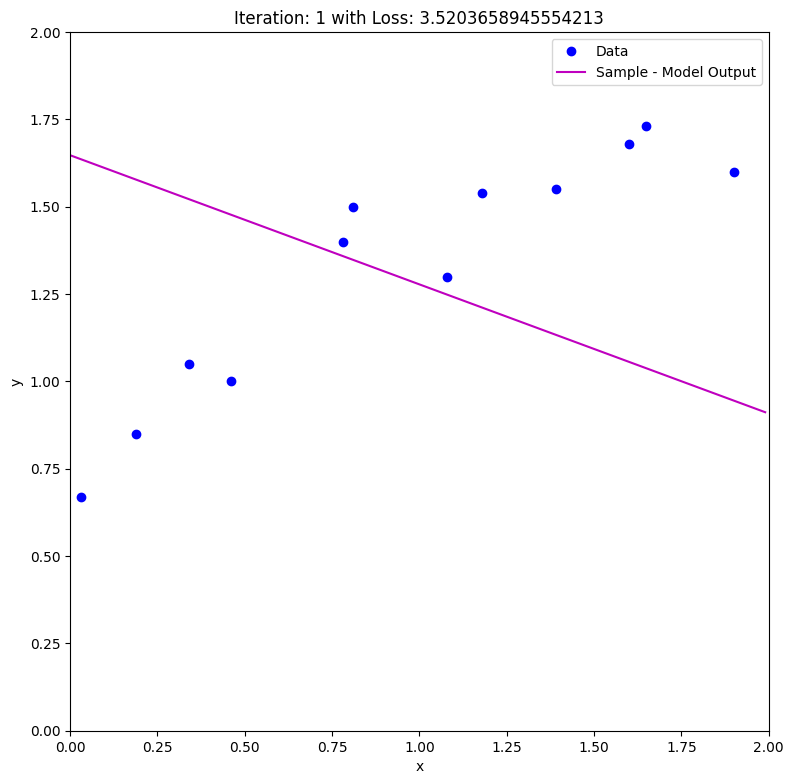

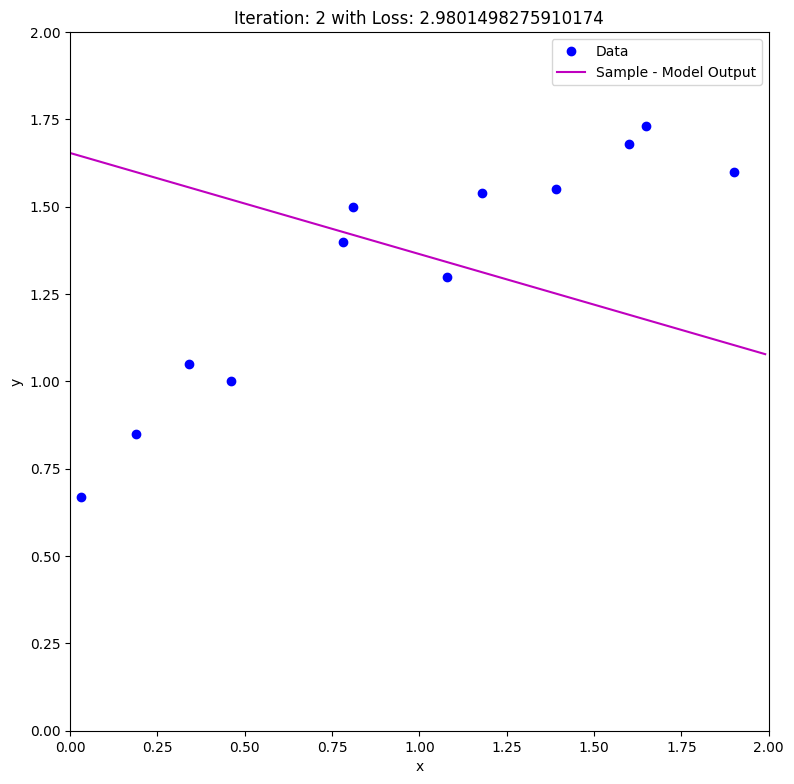

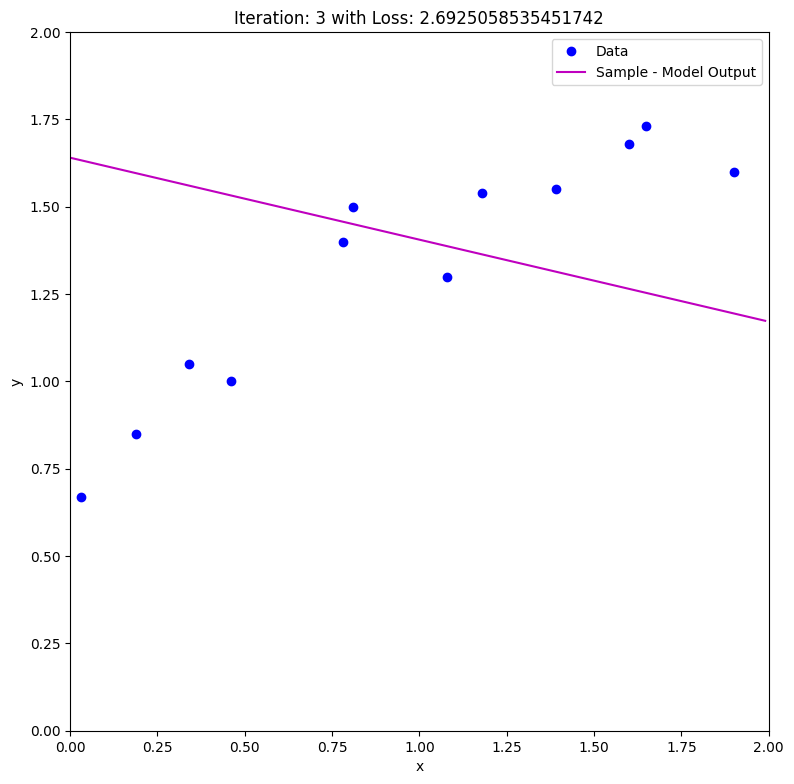

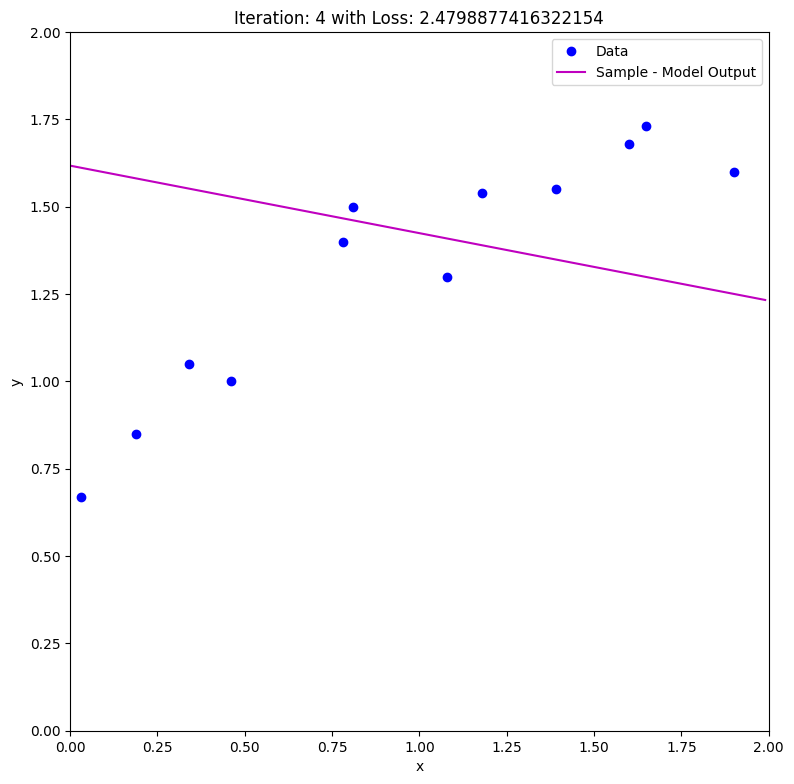

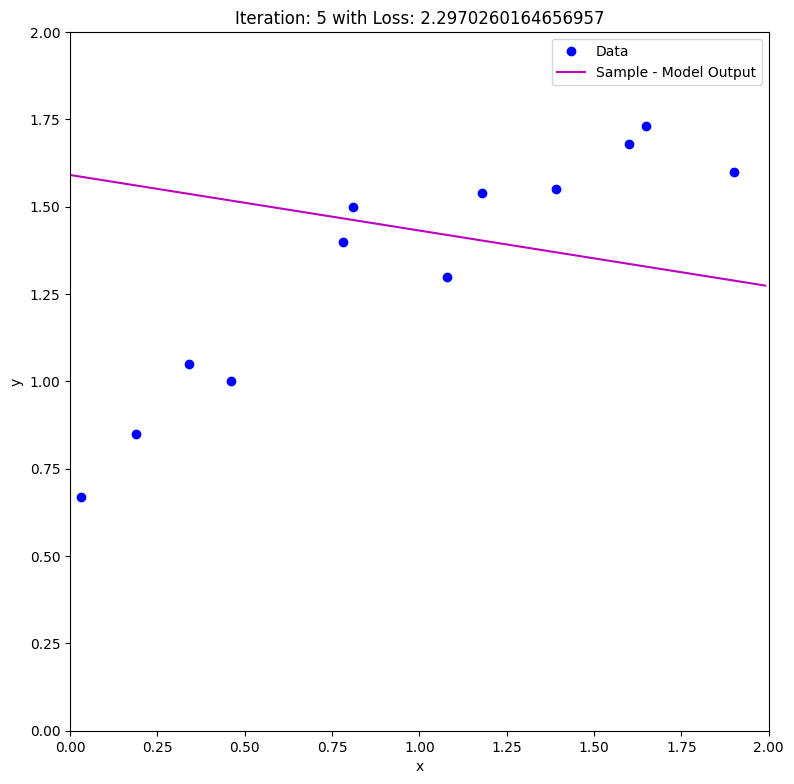

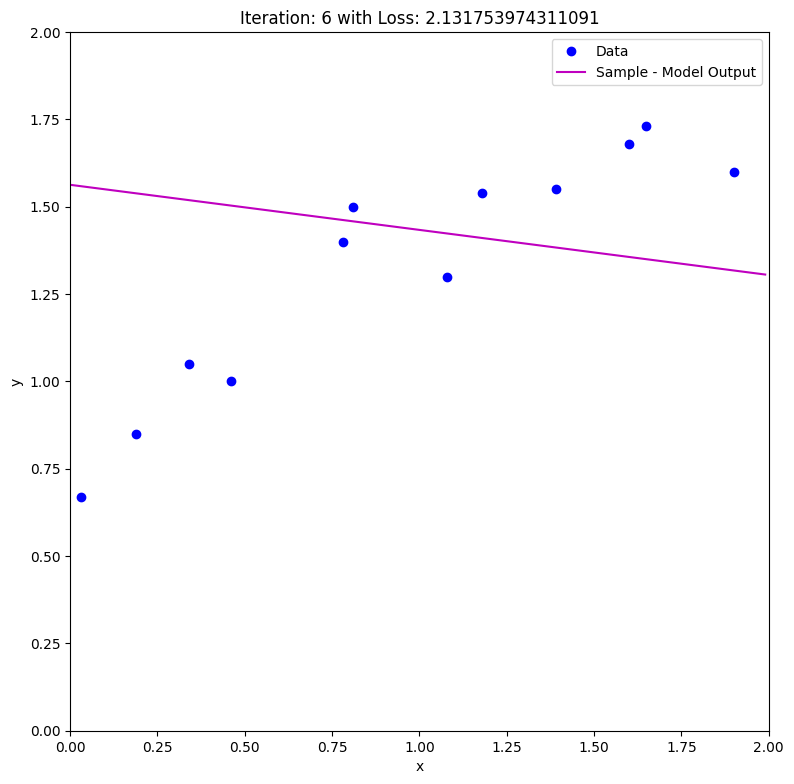

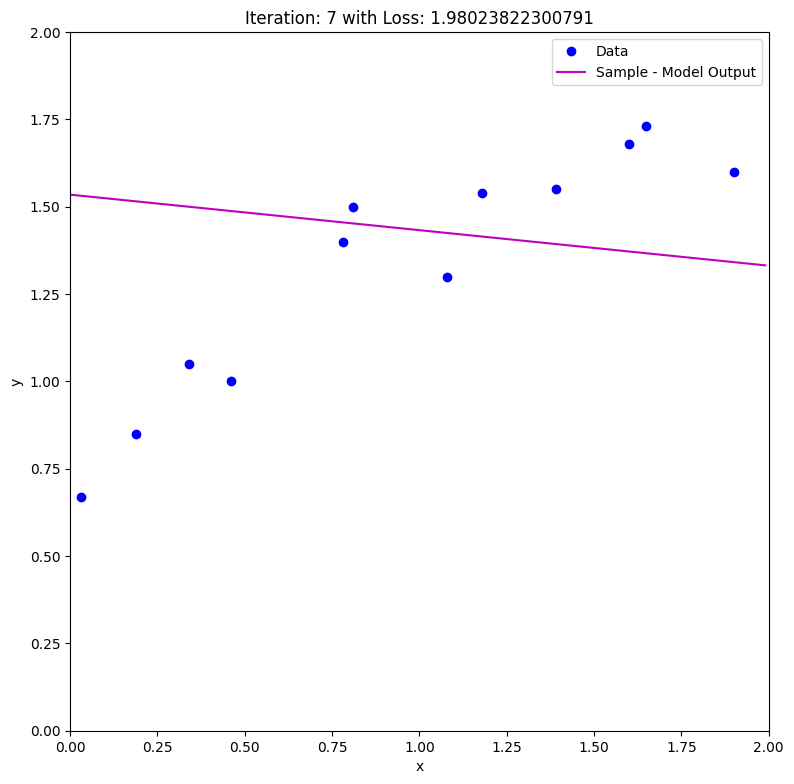

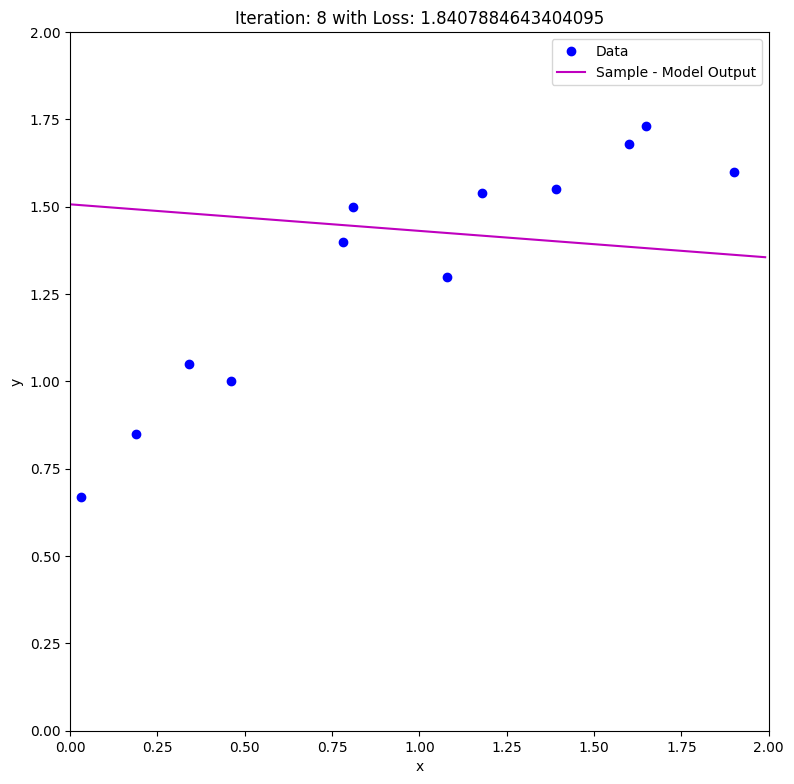

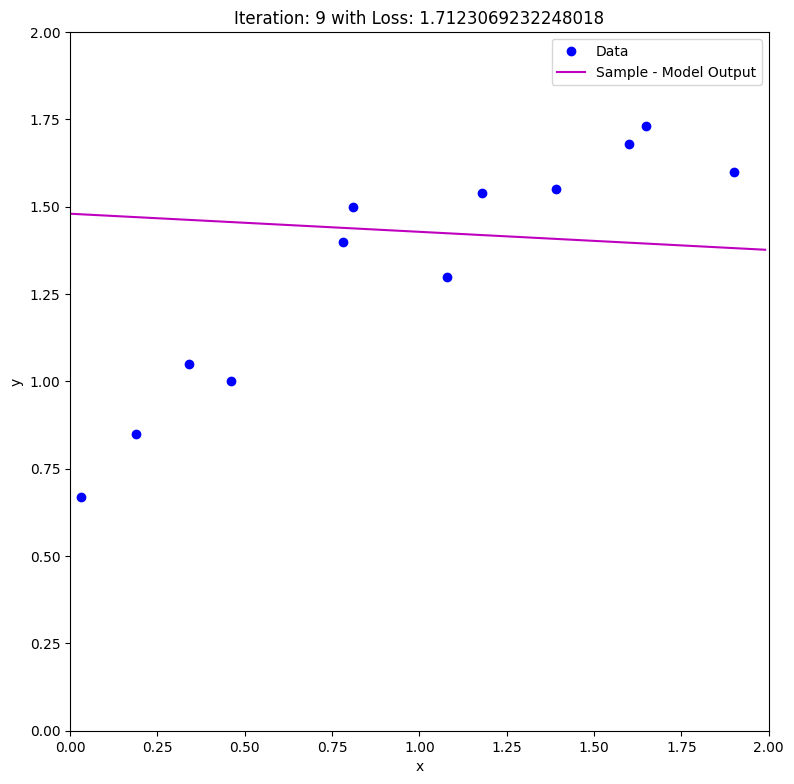

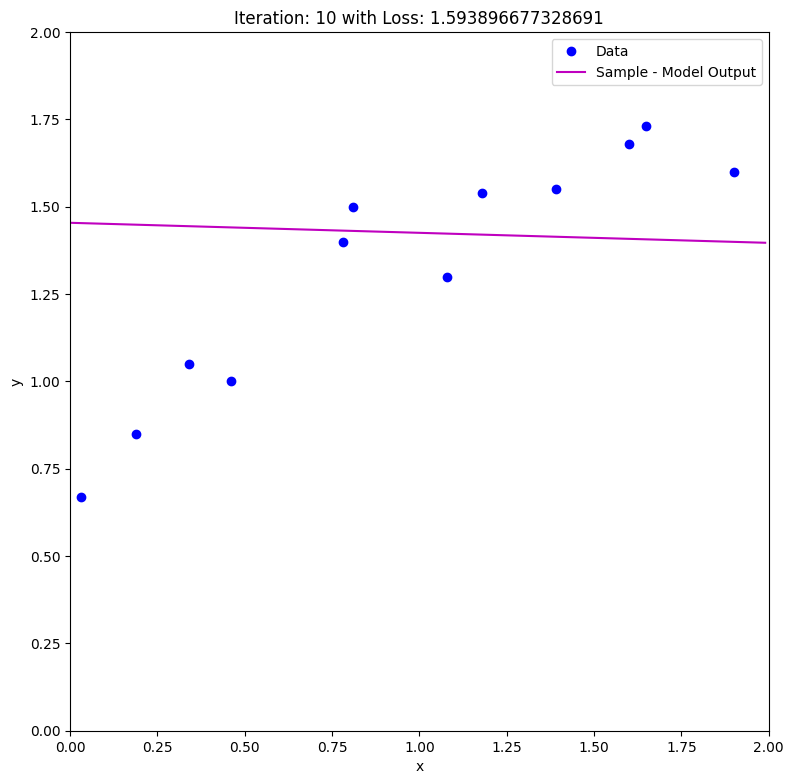

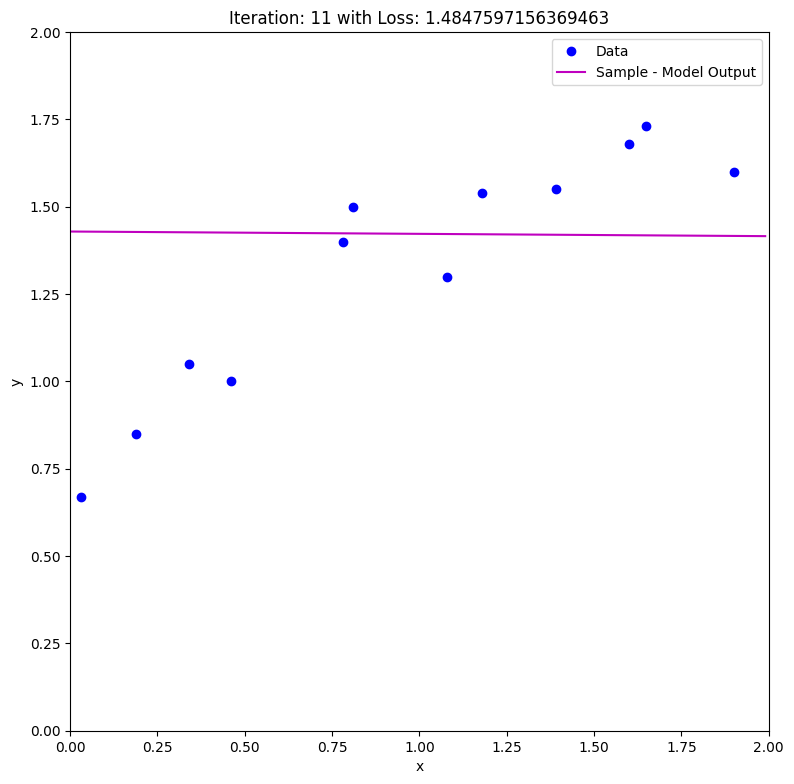

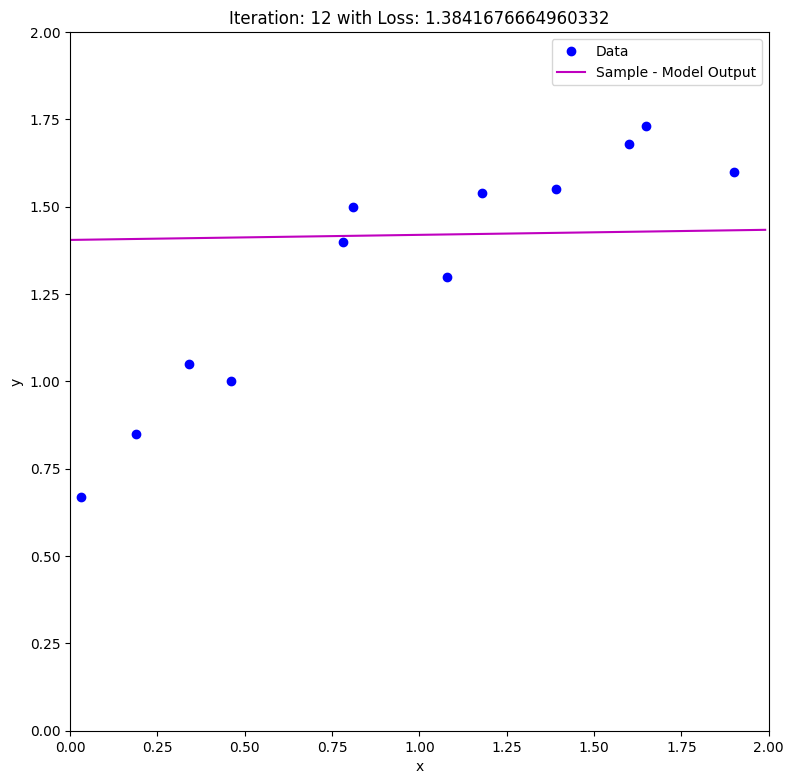

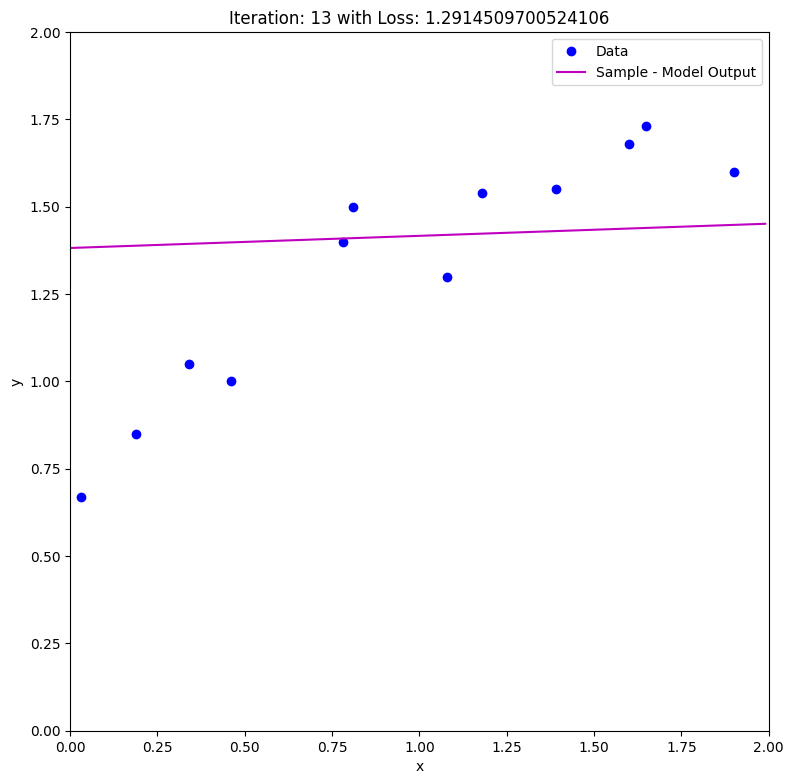

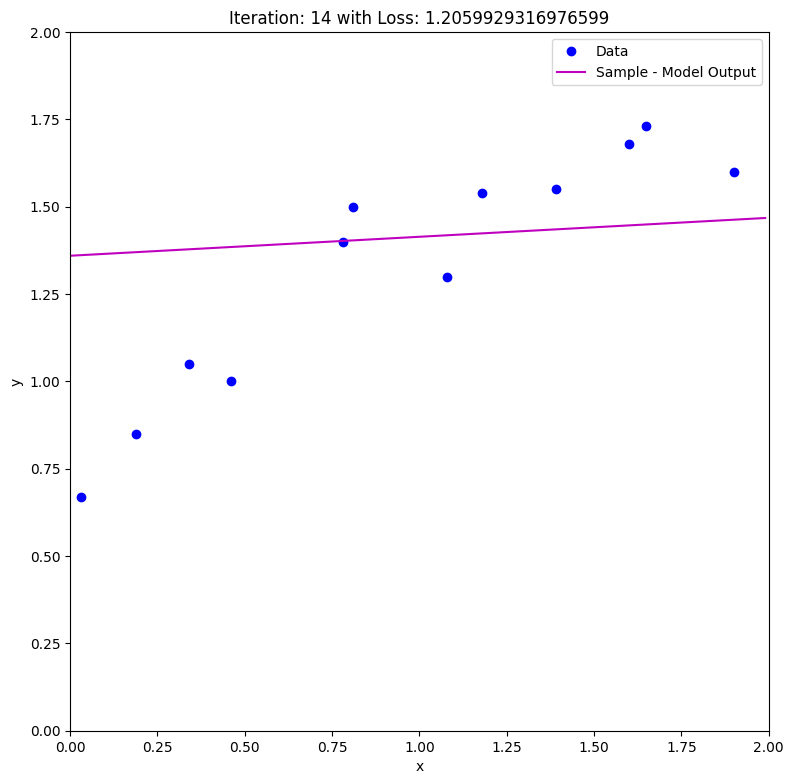

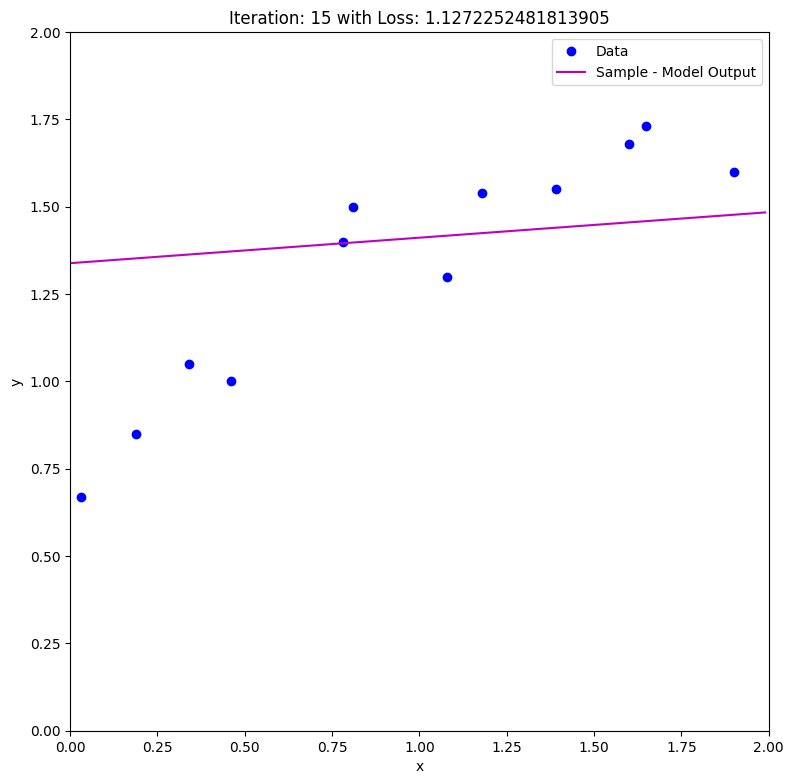

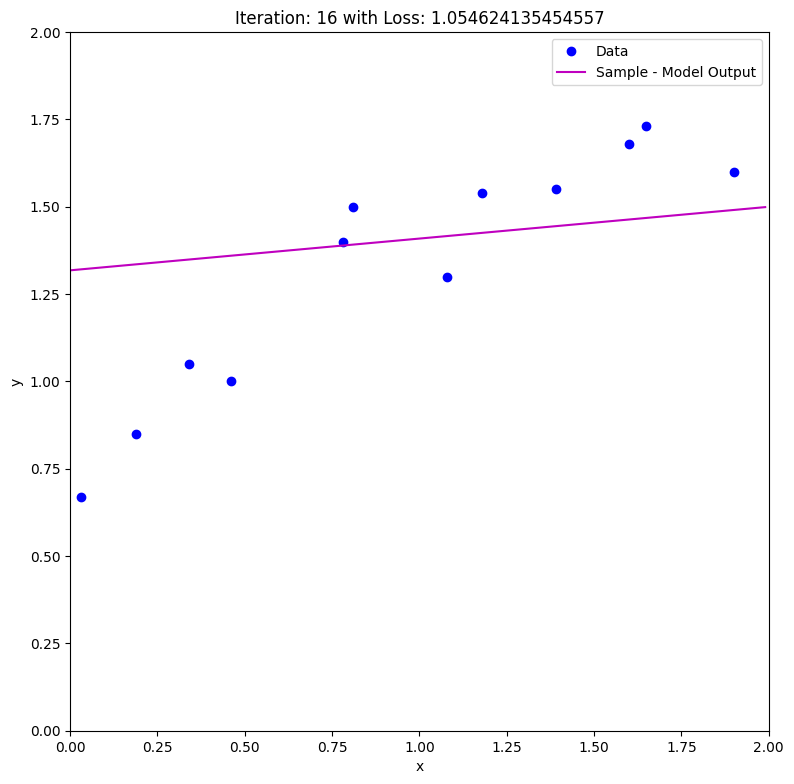

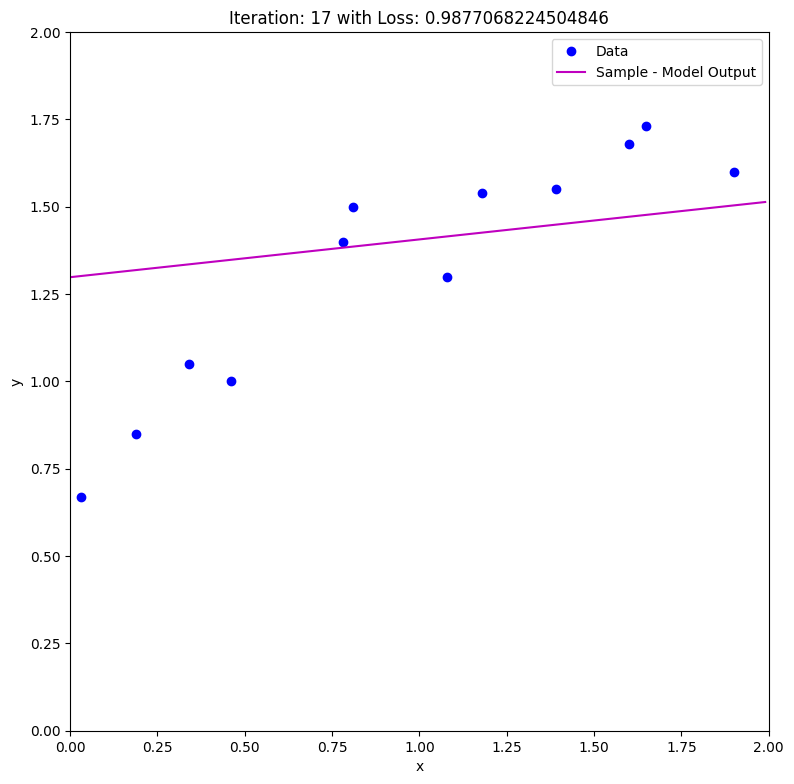

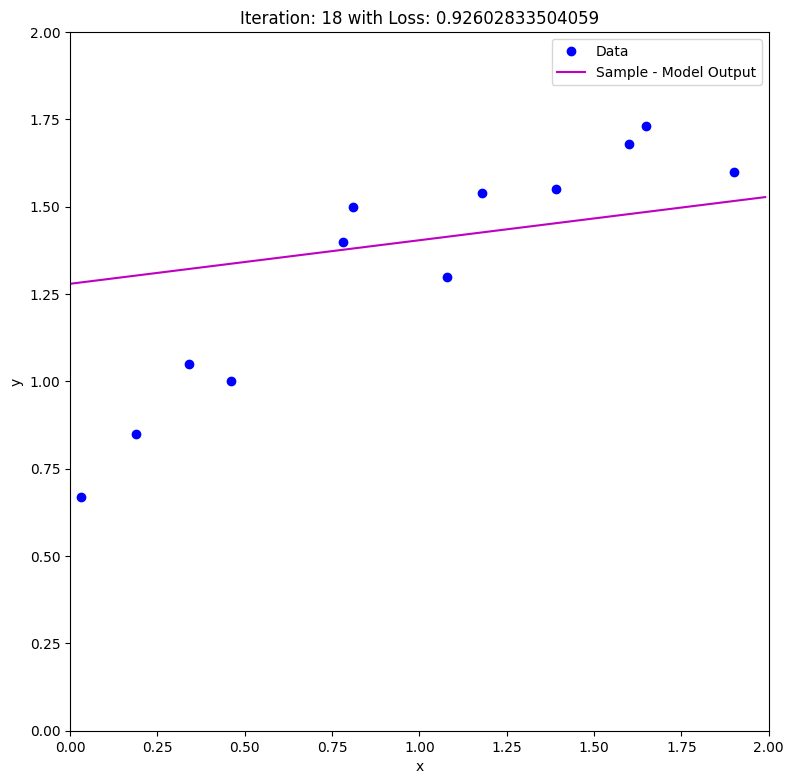

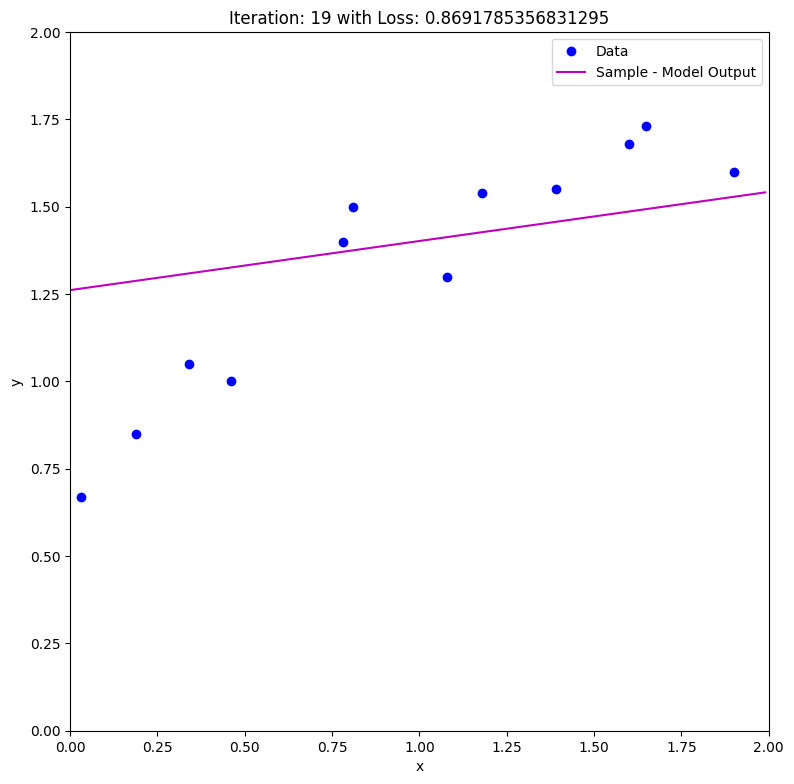

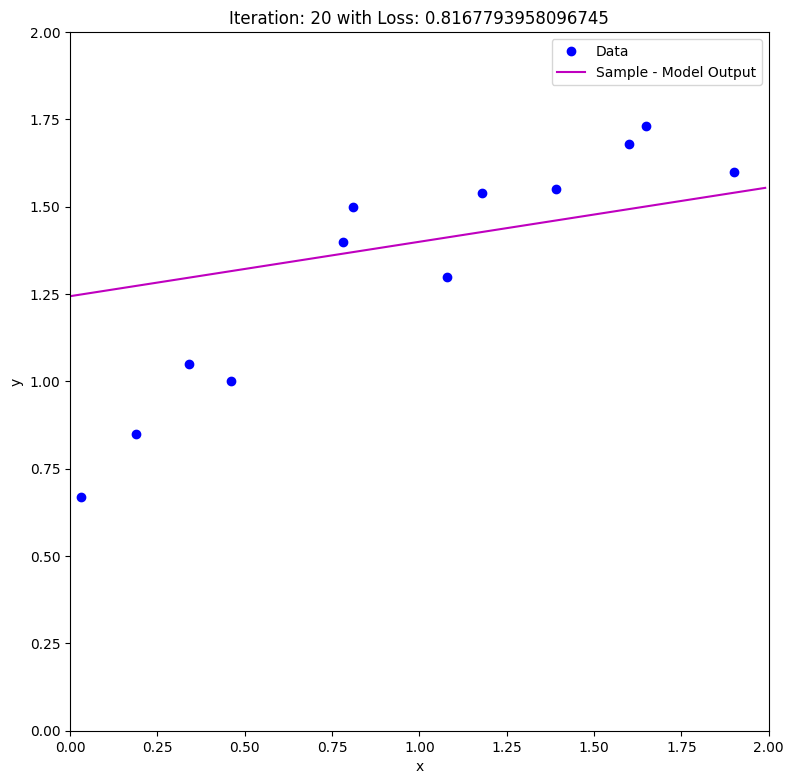

In [69]:
for idx in range(steps):
  phiBase[:,idx+1:idx+2] = GradientDescentStep(phiBase[:,idx:idx+1],data,ModelBase)
  loss = ComputeLoss(data[0,:],data[1,:],ModelBase,phiBase[:,idx+1:idx+2])
  DrawModel(data,ModelBase,phiBase[:,idx+1],f"Iteration: {idx+1} with Loss: {loss}")

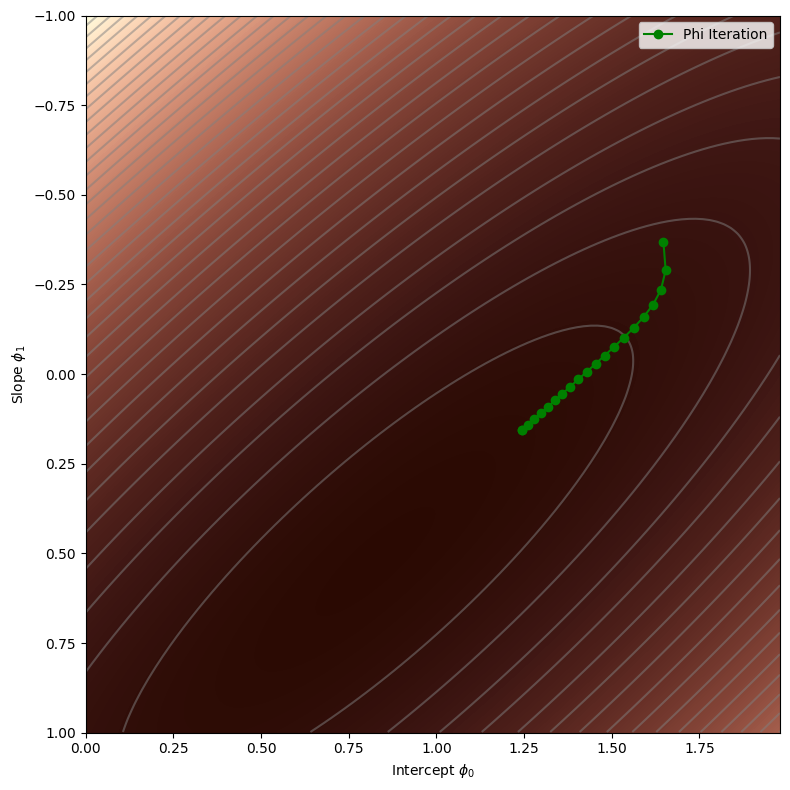

In [70]:
DrawLossFunction(ComputeLoss,data,ModelBase,phiBase)